In [58]:
import warnings
warnings.filterwarnings("ignore")
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['patch.force_edgecolor'] = True
import string
from nltk.tokenize import word_tokenize
import spacy

In [59]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
dataset = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [75]:
df = dataset[['v2', 'v1']]
df.columns = ['text', 'label']

In [76]:
df.shape
df=df.drop_duplicates()
df.shape

(5169, 2)

In [77]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

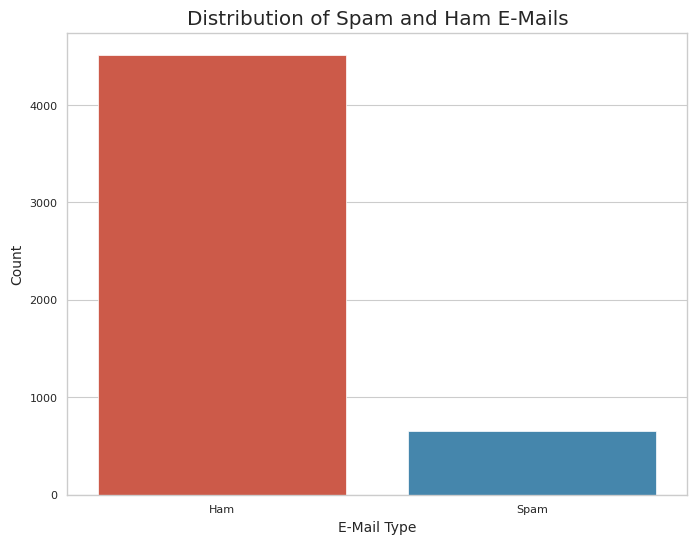

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')

plt.xlabel('E-Mail Type')
plt.ylabel('Count')

plt.title('Distribution of Spam and Ham E-Mails')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

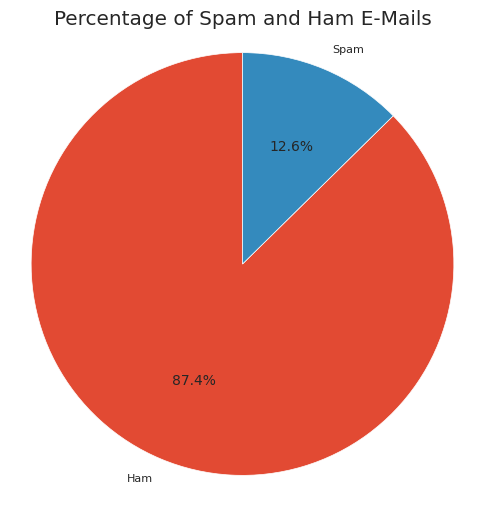

In [79]:
spam_count = df['label'].value_counts()[1]
ham_count = df['label'].value_counts()[0]

# Create a pie chart to show the percentage of spam and ham messages
plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']

sizes = [ham_count, spam_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Spam and Ham E-Mails')
plt.axis('equal')
plt.show()

In [80]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, 
                                                    random_state=42)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [81]:
try:
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
except:
    pass

In [82]:
classifier = MultinomialNB()
classifier.fit(X_train_features, y_train)

MultinomialNB()

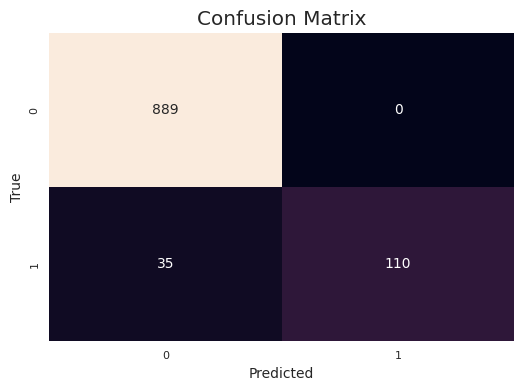

In [83]:
y_pred = classifier.predict(X_test_features)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix')
plt.show()

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       889
        spam       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



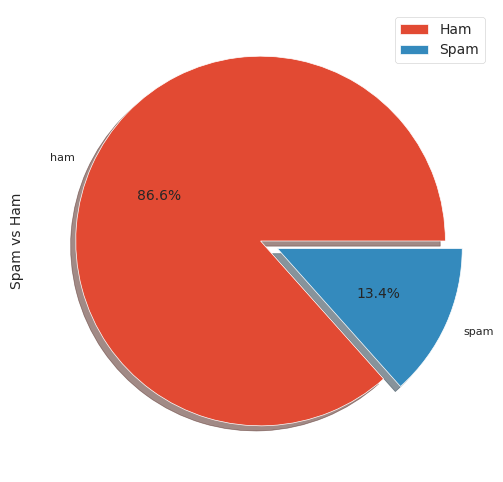

In [85]:
dataset = dataset.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
dataset.columns = ["category", "text"]
dataset["category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

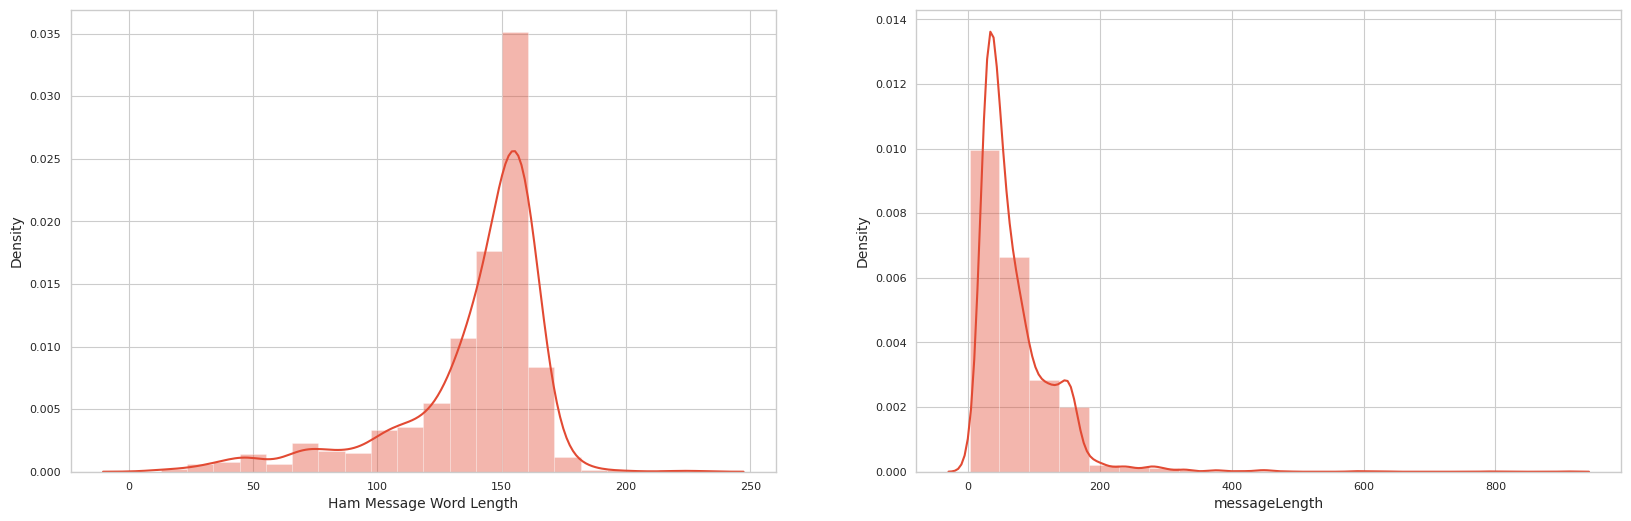

In [86]:
dataset["messageLength"] = dataset["text"].apply(len)
dataset["messageLength"].describe()
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(dataset[dataset["category"] == "spam"]["messageLength"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(dataset[dataset["category"] == "ham"]["messageLength"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()